In [72]:
import numpy as np
import matplotlib.pyplot as plt

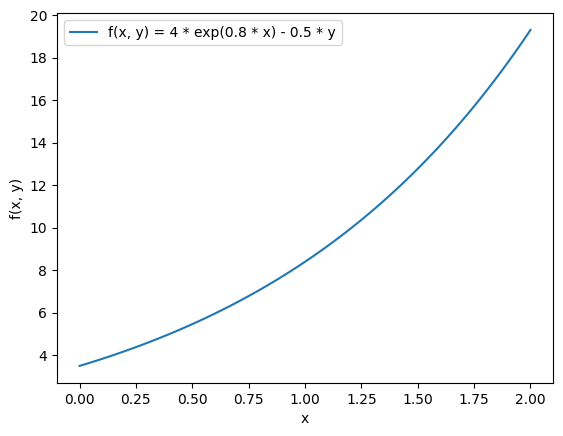

In [73]:
# Define the differential equation y'(x) = f(x, y)
def f(x, y):
    return 4 * np.exp(0.8 * x) - 0.5 * y

# Example usage
x_values = np.linspace(0, 2, 100)
y_values = f(x_values, 1)  # Example with y = 1

# Plot the function to visualize
plt.plot(x_values, y_values, label="f(x, y) = 4 * exp(0.8 * x) - 0.5 * y")
plt.xlabel('x')
plt.ylabel("f(x, y)")
plt.legend()
plt.show()

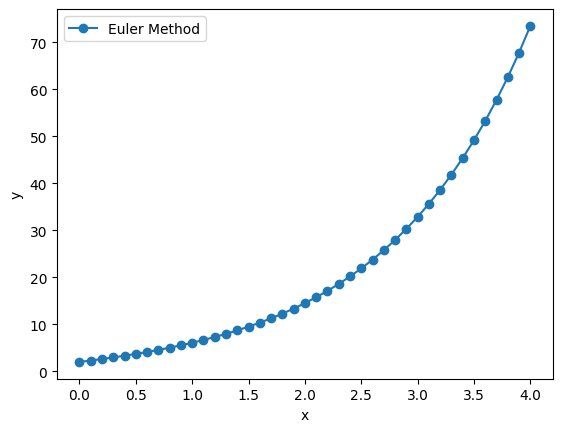

In [74]:
# Euler Method Implementation

# Define the Euler method
def euler_method(f, x0, y0, h, x_max):
    n = int(x_max / h)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(1, n + 1):
        y[i] = y[i - 1] + h * f(x[i - 1], y[i - 1])
        x[i] = x[i - 1] + h
    return x, y

# Initial conditions
x0 = 0
y0 = 2
h = 0.1
x_max = 4

# Solve the differential equation using the Euler method
x_euler, y_euler = euler_method(f, x0, y0, h, x_max)

# Plot the results
plt.plot(x_euler, y_euler, 'o-', label='Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

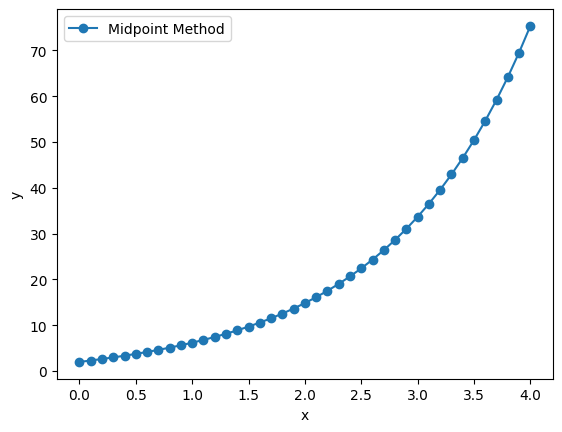

In [75]:
# Midpoint Method Implementation

# Define the Midpoint method
def midpoint_method(f, x0, y0, h, x_max):
    n = int(x_max / h)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(1, n + 1):
        k1 = h * f(x[i - 1], y[i - 1])
        k2 = h * f(x[i - 1] + h / 2, y[i - 1] + k1 / 2)
        y[i] = y[i - 1] + k2
        x[i] = x[i - 1] + h
    return x, y

# Solve the differential equation using the Midpoint method
x_midpoint, y_midpoint = midpoint_method(f, x0, y0, h, x_max)

# Plot the results
plt.plot(x_midpoint, y_midpoint, 'o-', label='Midpoint Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

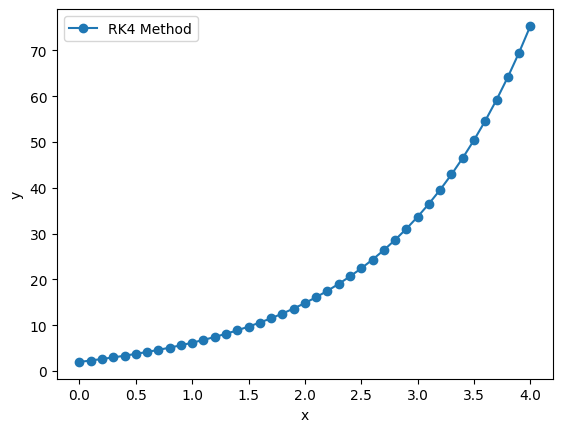

In [76]:
def rk4_method(f, x0, y0, h, x_max):
    n = int(x_max / h)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(1, n + 1):
        k1 = h * f(x[i - 1], y[i - 1])
        k2 = h * f(x[i - 1] + h / 2, y[i - 1] + k1 / 2)
        k3 = h * f(x[i - 1] + h / 2, y[i - 1] + k2 / 2)
        k4 = h * f(x[i - 1] + h, y[i - 1] + k3)
        y[i] = y[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x[i] = x[i - 1] + h
    return x, y

x_rk4, y_rk4 = rk4_method(f, x0, y0, h, x_max)

plt.plot(x_rk4, y_rk4, 'o-', label='RK4 Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

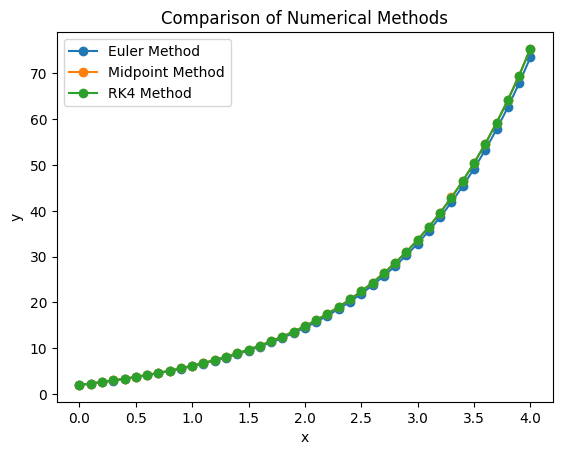

In [77]:
# Numerical Solution and Plotting

# Solve the differential equation using the Euler method
x_euler, y_euler = euler_method(f, x0, y0, h, x_max)

# Solve the differential equation using the Midpoint method
x_midpoint, y_midpoint = midpoint_method(f, x0, y0, h, x_max)

# Solve the differential equation using the RK4 method
x_rk4, y_rk4 = rk4_method(f, x0, y0, h, x_max)

# Plot the results for comparison
plt.plot(x_euler, y_euler, 'o-', label='Euler Method')
plt.plot(x_midpoint, y_midpoint, 'o-', label='Midpoint Method')
plt.plot(x_rk4, y_rk4, 'o-', label='RK4 Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Numerical Methods')
plt.show()

In [78]:
from colorama import init
import sympy as sp

# Define the symbols
x = sp.symbols('x')
y = sp.Function('y')

# Define the differential equation
func = 4 * sp.exp(0.8 * x) - 0.5 * y(x)
differential_eq = sp.Eq(y(x).diff(x), func)
initial_condition = {y(0): 2}
particular_solution = sp.dsolve(differential_eq, y(x), ics=initial_condition)

        method_name  computational_cost  h_value        relative_error
0      euler_method                  41  0.10000    0.0244823032241847
1   midpoint_method                  82  0.10000  0.000136673148355276
2        rk4_method                 164  0.10000   1.34364817132612e-7
3      euler_method                 401  0.01000   0.00244358111285230
4   midpoint_method                 802  0.01000   1.40994525899223e-6
5        rk4_method                1604  0.01000  1.33577083179721e-11
6      euler_method                4001  0.00100  0.000244307848811642
7   midpoint_method                8002  0.00100   1.41413168410362e-8
8        rk4_method               16004  0.00100  1.95227464260917e-13
9      euler_method               40001  0.00010   2.44302764796103e-5
10  midpoint_method               80002  0.00010  1.43474832679395e-10
11       rk4_method              160004  0.00010  2.02112297541616e-12
12     euler_method              400000  0.00001   1.04681095613124e-5
13  mi

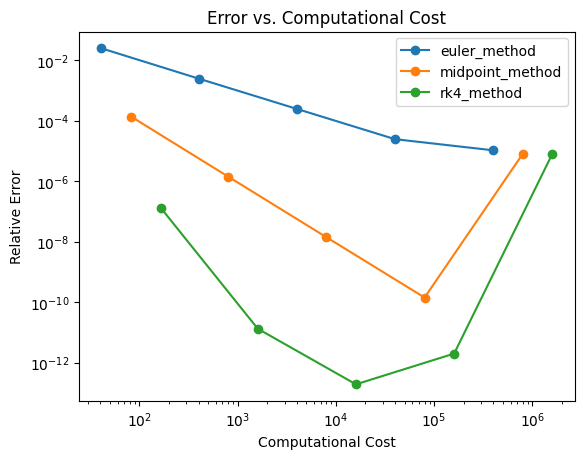

In [84]:
import pandas as pd

value_at = 4

method_cost = {
    euler_method: 1,
    midpoint_method: 2,
    rk4_method: 4
}

h_values = np.logspace(-1, -5, 5)

analytical_solution = particular_solution.subs(x, value_at).rhs

results = []

for h_value in h_values:
    for method in [euler_method, midpoint_method, rk4_method]:
        x_values, y_values = method(f, 0, 2, h_value, value_at)
        computational_cost = len(y_values) * method_cost[method]
        relative_error = np.abs(y_values[-1] - analytical_solution) / analytical_solution
        results.append({
            'method_name': method.__name__,
            'computational_cost': computational_cost,
            'h_value': h_value,
            'relative_error': relative_error
        })

# Create DataFrame
df = pd.DataFrame(results)
print(df)

# Plot the results
for method in [euler_method, midpoint_method, rk4_method]:
    method_results = df[df['method_name'] == method.__name__]
    plt.plot(method_results['computational_cost'], method_results['relative_error'], 'o-', label=method.__name__)
plt.xlabel('Computational Cost')
plt.ylabel('Relative Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Error vs. Computational Cost')
plt.legend()
plt.show()
